In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from tqdm import tqdm  
from xgboost import XGBClassifier
from scipy import stats as st
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, precision_score, balanced_accuracy_score
from statistics import mean
from sklearn.metrics import precision_recall_fscore_support
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer



import warnings
warnings.simplefilter("ignore")



auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Abstract

La clasificación crediticia es demasiado importante para las compañías bancarías ya que en base de esta se toman las decisiones referentes a los préstamos, los créditos y demás productos que el banco pueda ofrecer; además permiten determinar el monto de estos productos y los beneficios que se pueden brindar a las personas, así también como para fundamentar el rechazo de la solicitud de algunos productos para personas con un historial o clasificación mala. 

Los bancos han estado recopilando algunas variables bancarias y crediticias de una manera manual, sin embargo, con el pasar de los años la información ha incrementado y esta tarea se vuelve muy tediosa para su realización por parte de un empleado.  Dado esto, se pretende realizar un sistema automático que permita clasificar las personas según su puntaje crediticio. Así pues, para poder construir el modelo, es necesario realizar algunas preguntas tales como: ¿La profesión de las personas es determinante en este puntaje? ¿Cuáles son las variables más determinantes al momento de establecer el puntaje crediticio de una persona? ¿La capacidad de endeudamiento y el comportamiento de pago son las variables más influyentes? ¿Cuáles modelos presentan el mejor rendimiento al momento de clasificar a los usuarios?¿Cuántos grupos de clientes se pueden formar por medio de una segregación aplicando modelos no supervisados?¿Qué características permite encontrar la aplicación de estos dos tipos de modelos?

# Objetivos

- Diseñar e implementar un modelo para la clasificación automática del puntaje crediticio de los clientes según su información e historial financiero.

- Implementar un sistema de segregación de clientes para la oferta de productos  apartir de su información financiera.

# Contexto comercial

Los bancos y empresas financieras se basan en las calificaciones crediticias para aceptar préstamos o créditos, además también se basan en la información y en esta clasificación para ofrecer productos a público o clientes objetivos.

# Contexto analítico

Actualmente muchos bancos realizan la clasificación creditica de manera manual recopilando información historica de sus clientes y el encargado de establecer si se acepta o rechaza un producto es un grupo de personas de una área específica de la compañía. Dado esto implementar un sistema que permita realizar esto de manera automática permitiria aumentar la eficiencia y la productividad del banco, aumentando su número de productos y de clientes. 

# Lectura y limpieza de datos

El primer paso para realizar el análisis y aplicar los modelos de clasifición y segregación es la limpieza de los datos. E esta etapa, la primera acción a realizar es la transformación de los datos numéricos que debido al sistema de extracción pueden tener algunas suciedades que dificultan su tratamiento.

In [ ]:
#Se leen los datos
#df = pd.read_csv('/train.csv')
df = pd.read_csv("/content/drive/MyDrive/DataScience_Coder/train.csv")

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_','').astype('float64')
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_','').astype('float64')
df['Annual_Income'] = df['Annual_Income'].str.replace('_','').astype('float64')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_','').astype('float64')
df['Age'] = df['Age'].str.replace('_','').astype('int64')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


## Tratamiento de datos nulos


El segundo paso es el tratamiento de los datos nulos. Para esto se encuntran aquellos datos que por alguna razón se perdieron o llegaron vacíos.

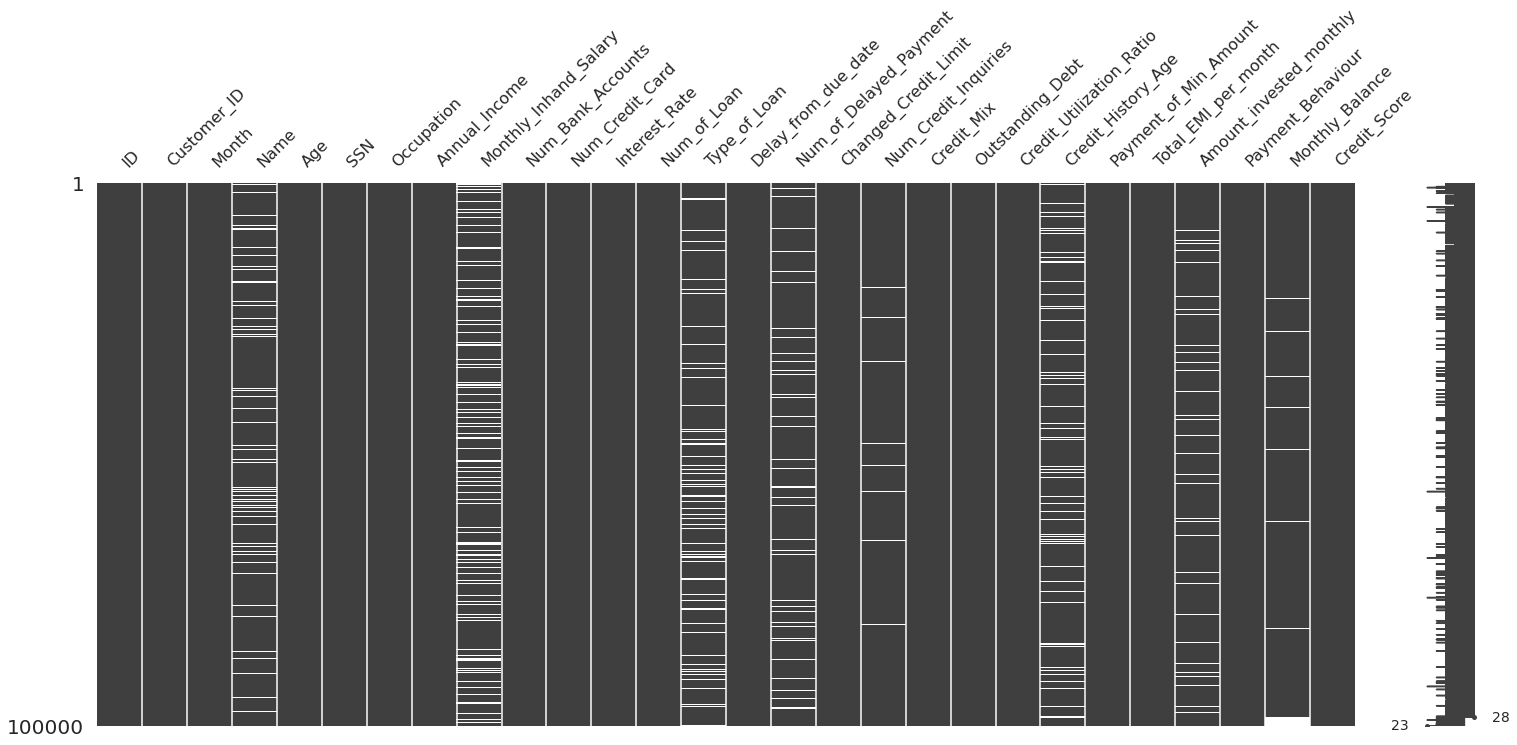

In [ ]:
msno.matrix(df)

Después es importante realizar una estrategia de reemplazo o llenado de la información. En este caso, como la información está dividida por usuarios, en este caso se reemplazará con la información inmediatamente anterior.

In [ ]:
df.ffill(axis=0, inplace=True)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,214.614934,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,214.614934,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,214.614934,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,214.614934,Standard


## Tratamiento de anomalias

El último paso en esta sección es el tratamiento de anomalías, en donde aquellos valores que estén por encima del tercer cuartil se reemplazarán por la mediana.

In [ ]:
def imputar_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper, # si el valor es mayor al q3
                 df.median(), # remplazar por la media
                 np.where(df < lower, # en caso contrario si es menor que el lower limit
                          df.median(), # tambien reemplazar por la media
                          df) # si ninguna de las dos cosas anteriores ocurre dejar el dato
                 )
   return df

In [ ]:
x = df._get_numeric_data()

In [ ]:
for column in x:
    df[column] = imputar_outliers_IQR(df[column])

In [ ]:
df['Credit_Utilization_Ratio'] = imputar_outliers_IQR(df['Credit_Utilization_Ratio'])
df['Annual_Income'] = imputar_outliers_IQR(df['Annual_Income'])
df['Outstanding_Debt'] = imputar_outliers_IQR(df['Outstanding_Debt'])
df['Amount_invested_monthly'] = imputar_outliers_IQR(df['Amount_invested_monthly'])
df['Monthly_Balance'] = imputar_outliers_IQR(df['Monthly_Balance'])
df.Age = imputar_outliers_IQR(df['Age'])

# Análisis exploratorio de los datos

Al tener los datos limpios, procedemos a realizar un análisis exploratorio de los datos. La primera etapa es revisar el tipo de datos que conforman la base de datos.

In [ ]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

Vamos a analizar el comportamniento de endeudamiento de las personas durante los meses registrados en la base de datos. En esta gráfica se puede observar que el mes donde menos se sacan o utilizan créditos es en el mes de abril, mientras que en agosto está la máxima taza registrada. Se puede interpretar como la época cercana a navidad, donde los gstos y compras de las personas aumentan.

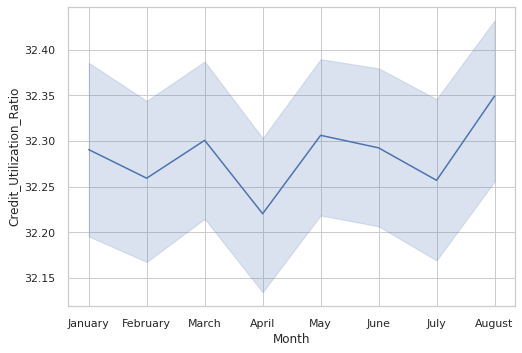

In [ ]:
sns.set_theme(style="whitegrid")
sns.lineplot(x="Month", y="Credit_Utilization_Ratio", data=df)



Otro factor importante para responder las preguntas planteadas es determinar la cantidad de registros catalogados como buenos, estandar o pobres:

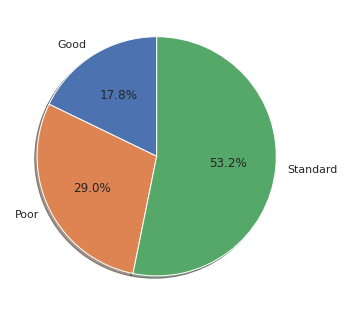

In [ ]:
class_group = df.groupby(['Credit_Score'])['ID'].count()
explode = (0, 0, 0)
plt.pie(class_group.values, labels=class_group.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

Acá se puede observar que 53174 registros crediticios son catalogados como puntaje estandar, alcanzando el 53.2% mientras que los registrados como buenos son el 17.8% y pobres el 29%. Se observa claramente un desbalance en las clases de clasificación.

También analizamos el comportamiento de pago  mensual de los clientes, donde el 25.5% es catalogado como gastos bajos y pequeños valores de pago. Mientras que el 10.4% gasta gran cantidad de dinero y pagar también valores altos.

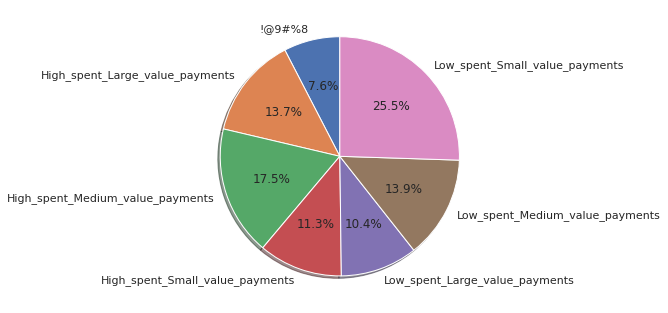

In [ ]:
payment_group = df.groupby(['Payment_Behaviour'])['ID'].count()
explode = (0, 0, 0)
plt.pie(payment_group.values, labels=payment_group.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

En este gráfico se analiza la cantidad de consumidores por cada una de las profesiones, encontrando que la mayor cantidad de consumidores no especificaron su ocupación, mientras que los que si lo hicieron, la profesión de abogado es la más común.

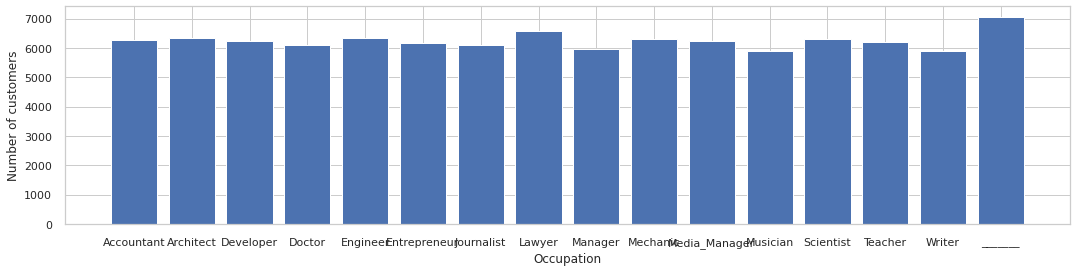

In [ ]:
customer_group = df.groupby(['Occupation'])['ID'].count()
plt.figure(figsize=(18,4))
plt.bar(x = customer_group.index, height = customer_group.values, data = customer_group)
plt.xlabel('Occupation')
plt.ylabel('Number of customers')
plt.show()

También se analiza el ingreso anual  promedio de cada una de las clases o calificaciones crediticias existentes, encontrando que los catagolados como "Good" tienen un mayor ingreso al año.

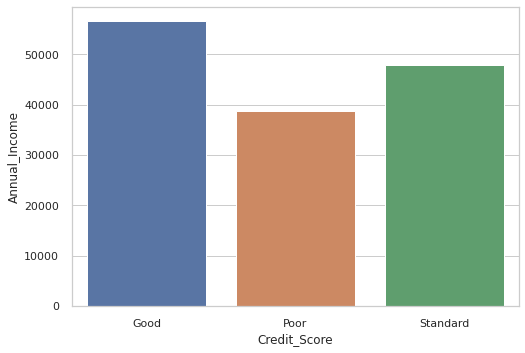

In [ ]:
annual_group = df.groupby(['Credit_Score'],as_index = False)['Annual_Income'].mean()
sns.barplot(x="Credit_Score", y="Annual_Income", data=annual_group)

La gráfica muestra que los calificados como pobres tienen un ingreso anual mucho menor que los estandar y buenos, siendo la diferencia entre estos dos últimos muy mínima, lo cual si sirve para determinar si una persona va atener calificación pobre o no.

También es importante analizar y estudiar el comportamiento de las otras variables, para lo cual se calcula la correlación. Esta nos confirma relación muy fuerte entre el salario mensual y el ingreso anual de los clientes, alcanzando el 93%.

La correlación también nos permite encontrar que mientras una persona tiene número de cuentas de banco, mayor número de solicitudes de crédito, una mayor deuda y un retraso en la fecha de pago, mayor es la taza de interés. Además, a mayor número de cuentas de banco, mayor retraso en la fecha de pago.

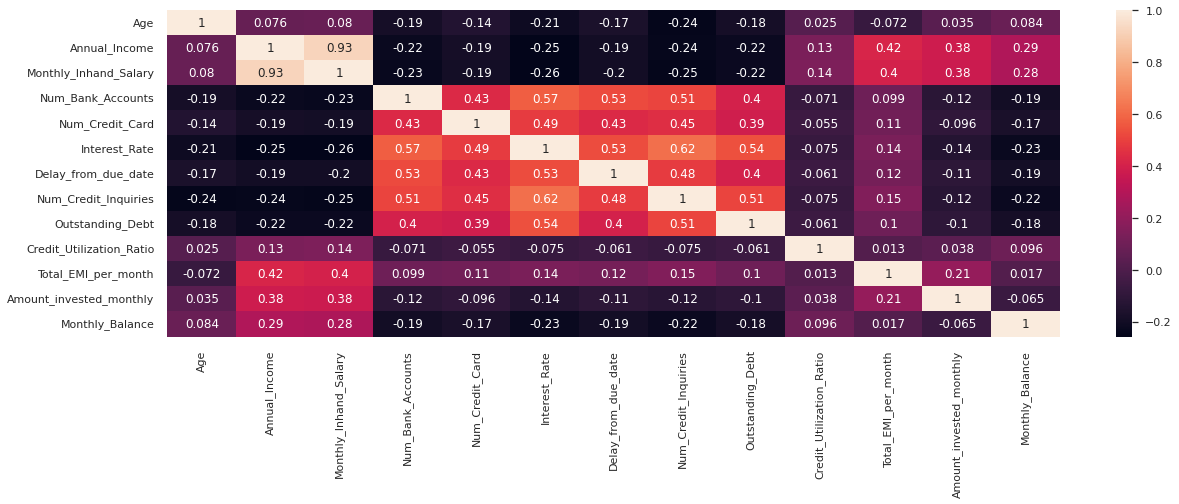

In [ ]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(20, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Por otro lado, encontramos que las personas que tienen en promedio la mayor cantidad de días de retraso tienen una calificación crediticia pobre. Esto se puede validar en el siguiente gráfico de cajas y biigotes.

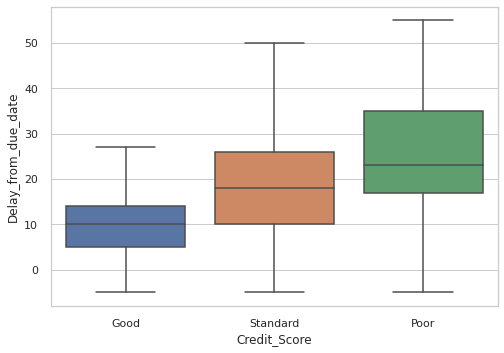

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Credit_Score", y="Delay_from_due_date", data=df,showfliers = False)

Se puede comprobar que los calificados como "Poor" tienen una mediana mucho mayor que el resto, mientras que los "Good" la tienen mucho menor. De estas distribuciones se puede concluir que esta variable es determinante al momento de realizar la clasificación de los clientes.

Otro aspecto a analizar es la cantidad de deuda de los clientes.

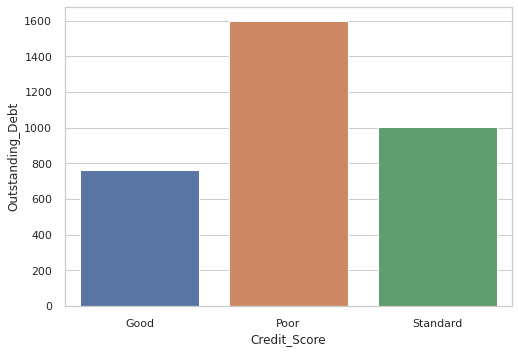

In [ ]:
debt = df.groupby(['Credit_Score'], as_index = False)['Outstanding_Debt'].mean()
sns.barplot(x="Credit_Score", y="Outstanding_Debt", data=debt)

En este caso se puede ver que los calificados como "Poor" tienen en promedio una deuda mayor que los otros dos. También se puede concluir que los usuarios con una clasificación como buena tienen una deuda mucho menor y mejor comportamiento de pago. 

Otro análisis importante es la distribución de los datos y del ingreso mensual de los clientes:

In [ ]:
income_group = df.groupby(['Customer_ID'],as_index = False)['Annual_Income'].mean()

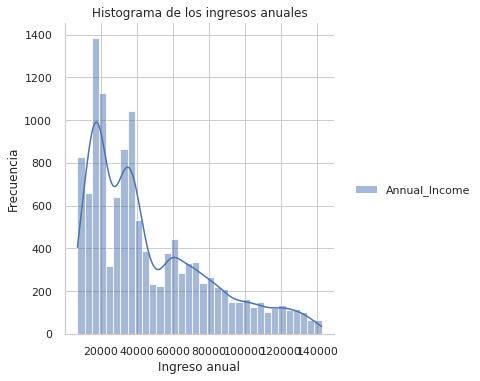

In [ ]:
sns.displot(income_group, color='#F2AB6D', kde=True) #creamos el gráfico en Seaborn

#configuramos en Matplotlib

plt.ylabel('Frecuencia')
plt.xlabel('Ingreso anual')
plt.title('Histograma de los ingresos anuales')

plt.show()

Como se puede observar, la moda de los salarios es menos a los 25000 dólares al año, estando la mayoria de la población ganando menos de 75000.

Por su parte,  la inversión mensual se presenta como una distribución casi normal.

In [ ]:
amount_group = df.groupby(['Name'],as_index = False)['Amount_invested_monthly'].mean()

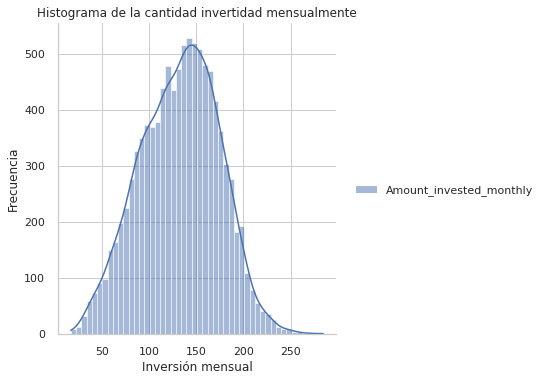

In [ ]:
sns.displot(amount_group, color='#F2AB6D', kde=True) #creamos el gráfico en Seaborn

#configuramos en Matplotlib

plt.ylabel('Frecuencia')
plt.xlabel('Inversión mensual')
plt.title('Histograma de la cantidad invertidad mensualmente')

plt.show()

También se procede a analizar la relación entre la edad y las demás variables como la inversión y las deudas obtenidas.

El primer paso para esto es  analizar la distribución de la edad, donde se puede ver la campana muy bien formada, mostrando una edad promedio alrededor de los 35 años.

In [ ]:
age_group = df.groupby(['Name'],as_index = False)['Age'].mean()

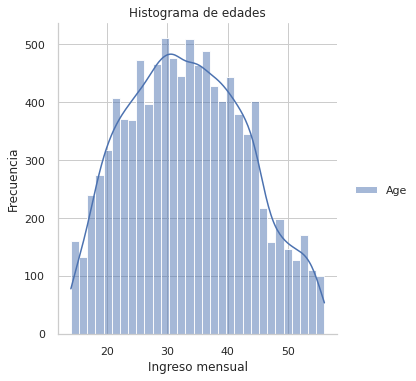

In [ ]:
sns.displot(age_group, color='#F2AB6D', kde=True) #creamos el gráfico en Seaborn

#configuramos en Matplotlib

plt.ylabel('Frecuencia')
plt.xlabel('Ingreso mensual')
plt.title('Histograma de edades')

plt.show()

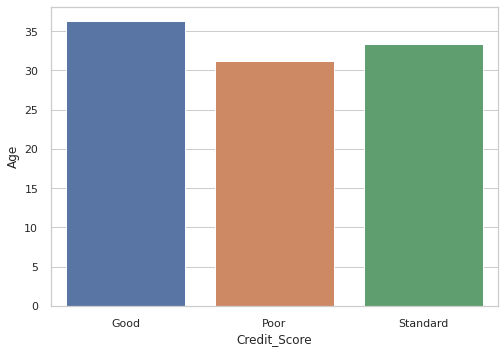

In [ ]:
age = df.groupby(['Credit_Score'], as_index = False)['Age'].mean()
sns.barplot(x="Credit_Score", y="Age", data=age)

También se encontró que los catalogados como pobres tienen una edad promedio menor al resto, lo cual se puede ver sustentado por la gráficas siguientes, donde se muestra que a menos edad, mayor es la deuda obtenida, mientras que existe una disminución cosiderable después de los 20 años manteniendose casi estable hasta los 45, donde disminuye mucho más.

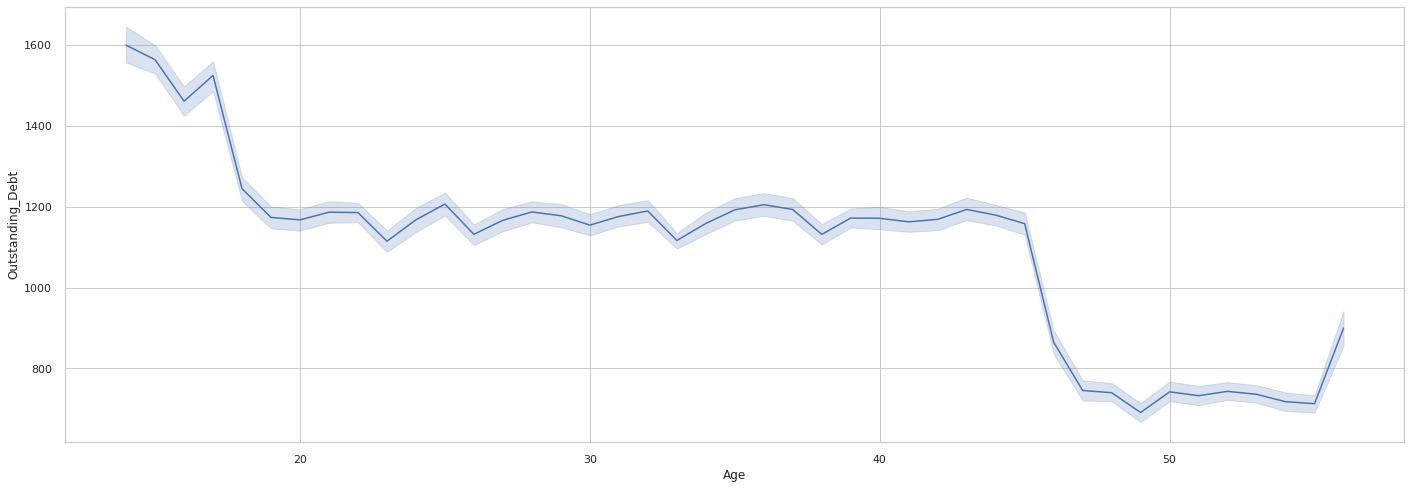

In [ ]:
plt.figure(figsize = (24,8))
sns.set_theme(style="whitegrid")
sns.lineplot(x="Age", y="Outstanding_Debt", data=df)



plt.show()

Caso contrario a las deudas, se puede ver que mientras que los jóvenes se endeudan más, invierten mucho menos que las personas más adultas, demotrando así su pobre calificación crediticia

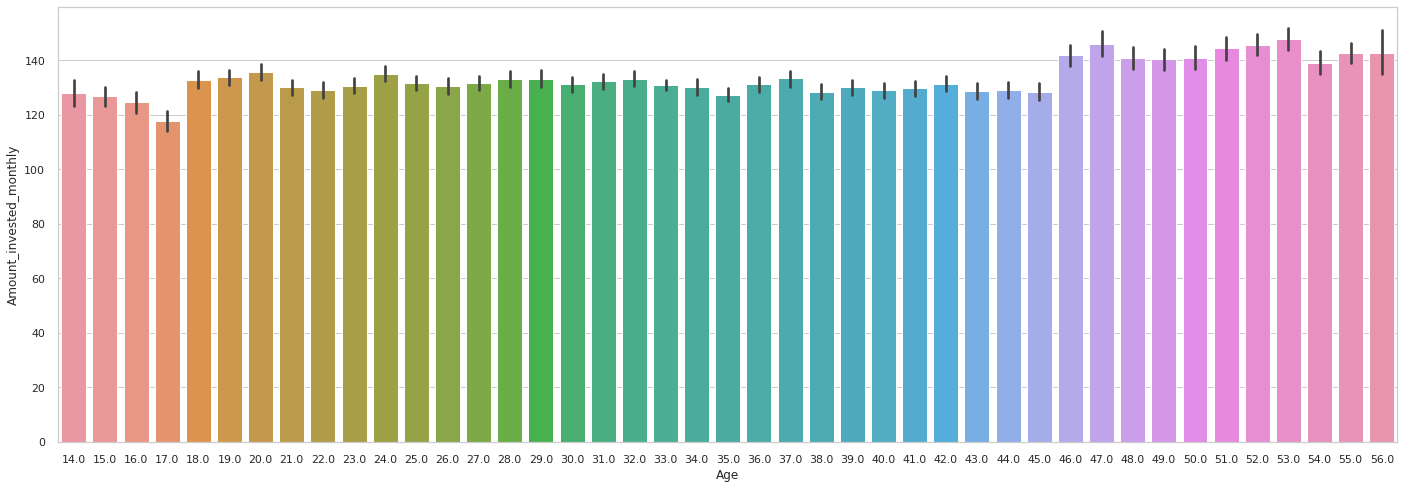

In [ ]:
plt.figure(figsize = (24,8))
sns.barplot(x="Age", y="Amount_invested_monthly", data=df)

plt.show()

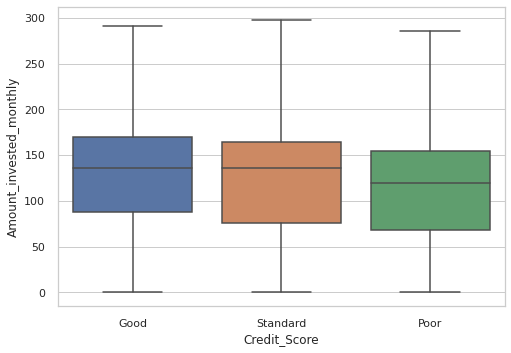

In [ ]:
amount = df.groupby(['Credit_Score'], as_index = False)['Amount_invested_monthly'].mean()
ax = sns.boxplot(x="Credit_Score", y="Amount_invested_monthly", data=df,showfliers = False)

También se puede ver que las personas con un menor gasto tiene una mayor inversión y una menor deuda.

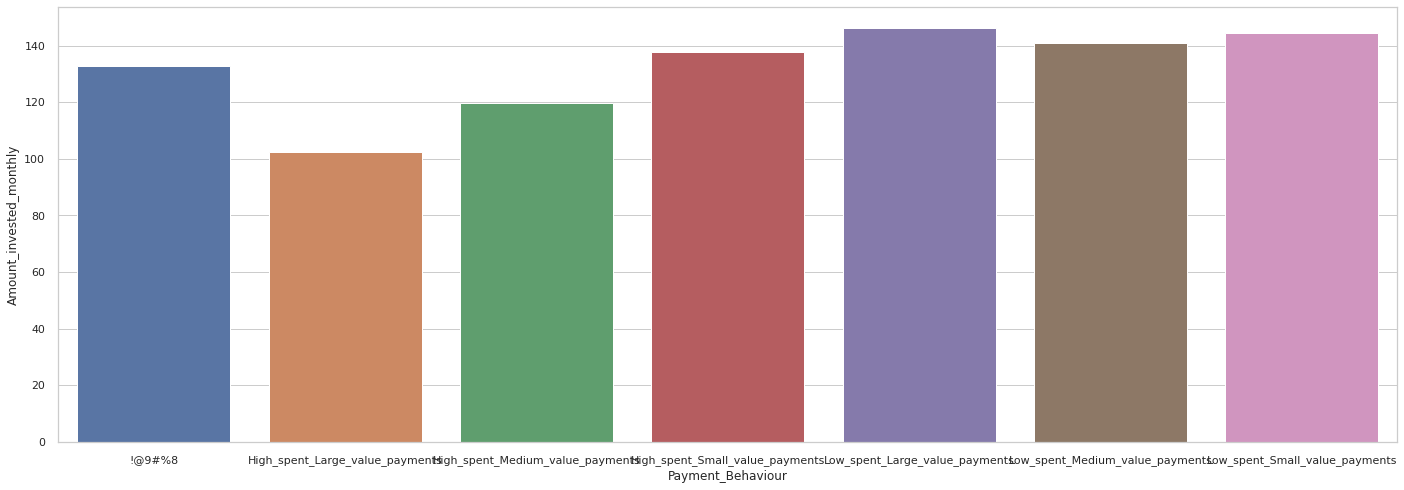

In [ ]:
plt.figure(figsize = (24,8))
inv = df.groupby(['Payment_Behaviour'], as_index = False)['Amount_invested_monthly'].mean()
sns.barplot(x="Payment_Behaviour", y="Amount_invested_monthly", data=inv)

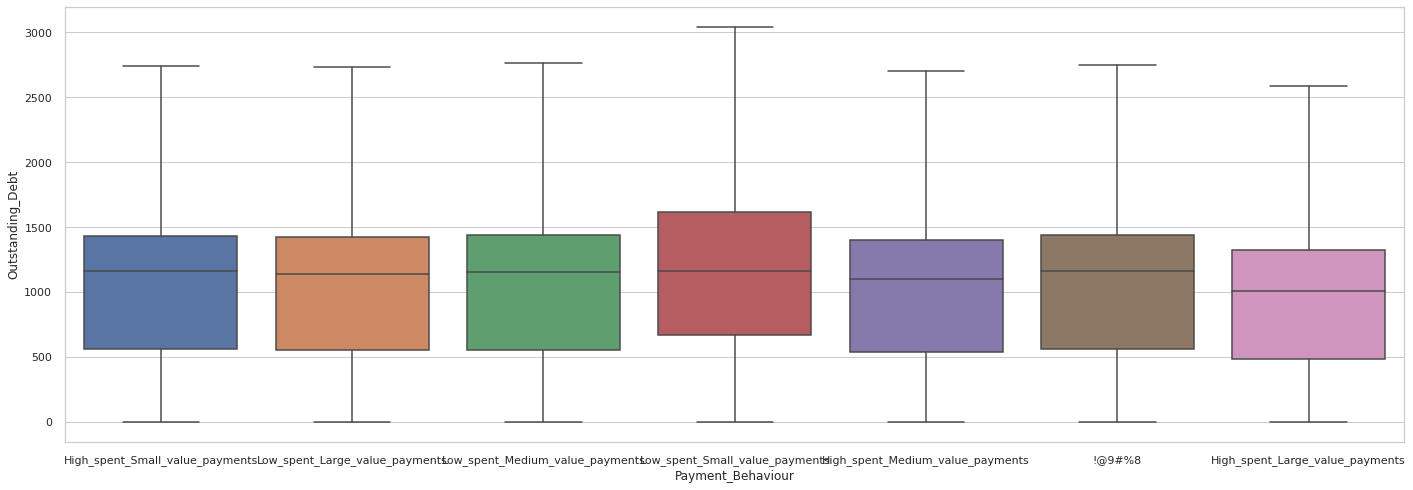

In [ ]:
plt.figure(figsize = (24,8))
debt = df.groupby(['Payment_Behaviour'], as_index = False)['Outstanding_Debt'].mean()
sns.boxplot(x="Payment_Behaviour", y="Outstanding_Debt", data=df,showfliers = False)

Todo esto se resume en el balence mensual, donde se puede ver la diferencia notable entre las tres clases. La clasificación "Good" presenta un balance mayor

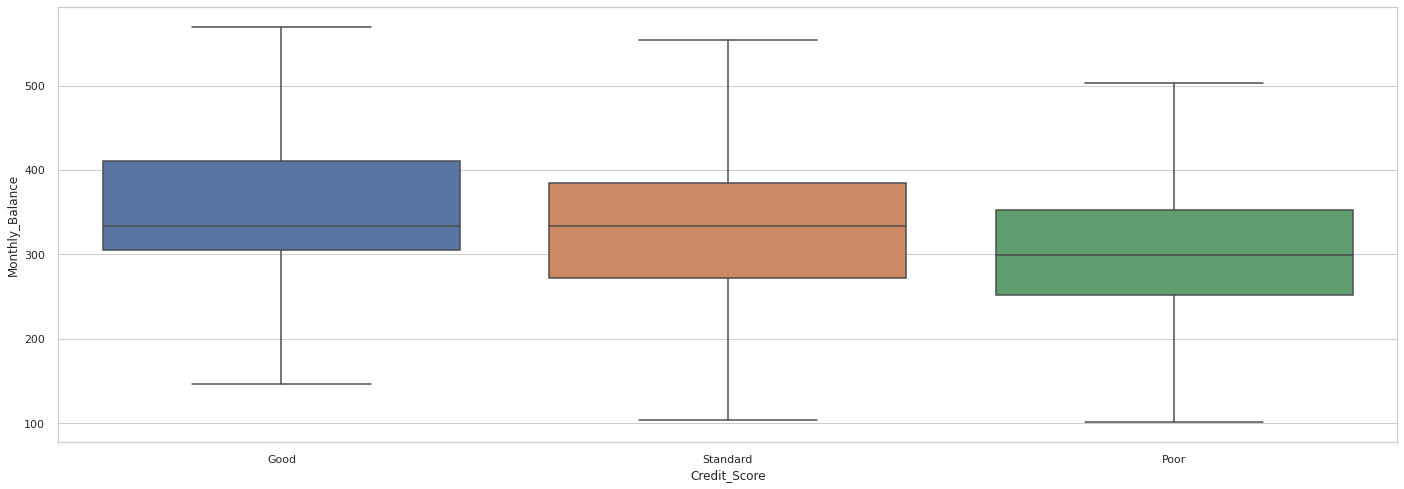

In [ ]:
plt.figure(figsize = (24,8))
balance = df.groupby(['Credit_Score'], as_index = False)['Monthly_Balance'].mean()
sns.boxplot(x="Credit_Score", y="Monthly_Balance", data=df,showfliers = False)

Las gráficas a continuación muestran que las personas que tienen la peor calificación crediticia tienen la mayor cantidad de cuentas de banco, tarjetas de crédito y son las qque realizan la mayor cantidad de solicitudes de crédito. Todo esto conlleva a lo ya visto en la correlación: a una taza de interes más alta y una deuda mucho mayor.

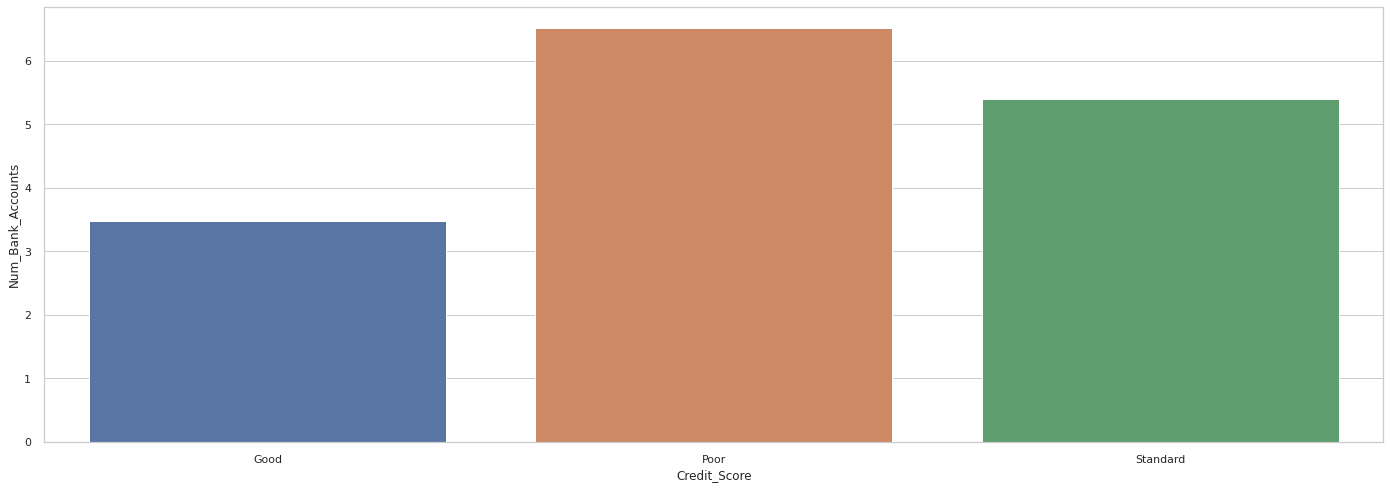

In [ ]:
plt.figure(figsize = (24,8))
num_bank = df.groupby(['Credit_Score'], as_index = False)['Num_Bank_Accounts'].mean()
sns.barplot(x="Credit_Score", y="Num_Bank_Accounts", data=num_bank)

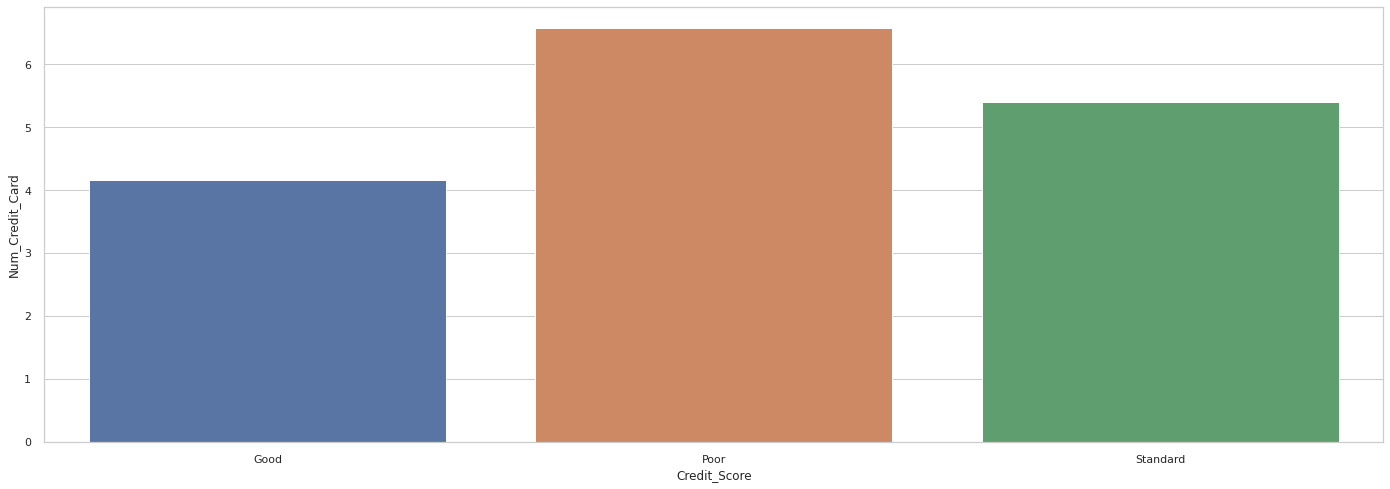

In [ ]:
plt.figure(figsize = (24,8))
num_credit = df.groupby(['Credit_Score'], as_index = False)['Num_Credit_Card'].mean()
sns.barplot(x='Credit_Score', y="Num_Credit_Card", data=num_credit)

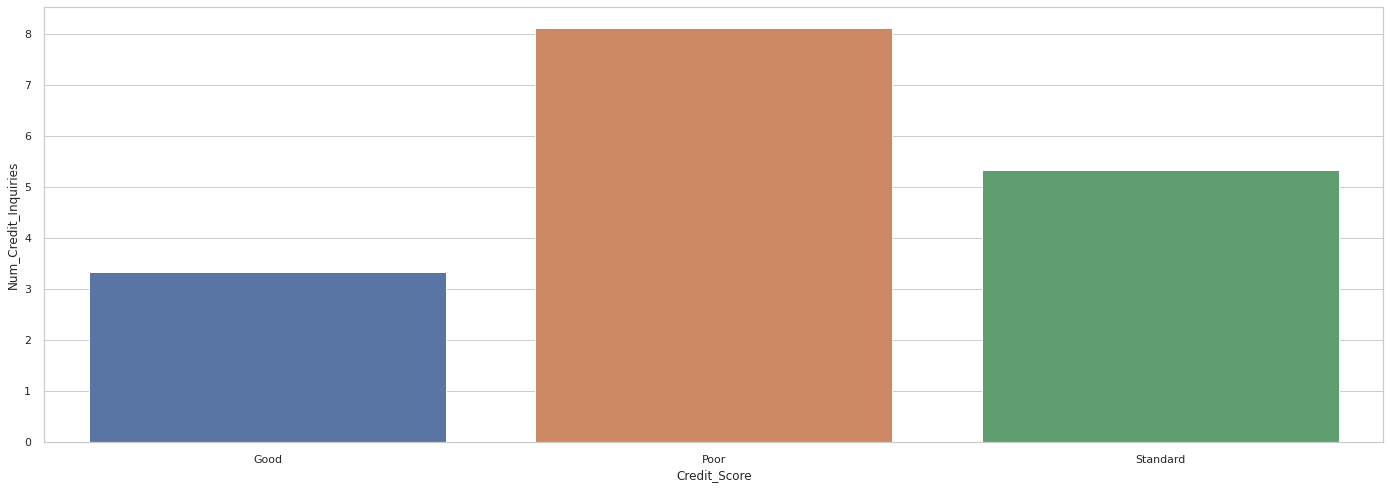

In [ ]:
plt.figure(figsize = (24,8))
num_inquiries = df.groupby(['Credit_Score'], as_index = False)['Num_Credit_Inquiries'].mean()
sns.barplot(x='Credit_Score', y="Num_Credit_Inquiries", data=num_inquiries)

# Ingeniería de atributos y selección de variables


Como ya se resaltó al momento de calcular la correlación, el salario mensual y el ingreso anual tienen una alta relación, por lo cual se decide trabajar solamente con el salario mensual.

El primer paso en la ingeniería de atributos es la estandarización de las variables numéricas, para garantizar que todas las variables se encuentren en los mismos rangos de valores.



In [ ]:
x = df._get_numeric_data()
x = x[['Monthly_Inhand_Salary', 'Interest_Rate', 'Delay_from_due_date', 
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']]

In [ ]:
x_est = StandardScaler().fit_transform(x)
x_est = pd.DataFrame(x_est)
x_est.columns = x.columns
x_est

,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.749685,-1.329061,-1.298842,-0.448012,-1.067671,-0.485550,-0.681817,-0.202199
1,-0.749685,-1.329061,-1.615326,-0.448012,-0.066369,-0.485550,-0.185584,-0.471213
2,-0.749685,-1.329061,-1.298842,-0.448012,-0.718405,-0.485550,-0.664987,-0.021514
3,-0.749685,-1.329061,-1.140600,-0.448012,-0.177224,-0.485550,0.878281,-1.061836
4,-0.749685,-1.329061,-1.061479,-0.448012,-1.463566,-0.485550,-1.192862,0.077725
...,...,...,...,...,...,...,...,...
99995,-0.215660,-0.866797,0.283577,-0.875200,0.465059,-0.666244,-0.936637,-1.147144
99996,-0.215660,-0.866797,-0.112027,-0.875200,1.618778,-0.666244,-1.025562,-1.147144
99997,-0.215660,-0.173401,0.600061,-0.875200,1.753636,-0.666244,-1.420786,-1.147144
99998,-0.215660,-0.866797,0.046215,-0.875200,0.264623,-0.666244,1.562570,-1.147144


In [ ]:
x_est.insert(0,"Credit_Score",df['Credit_Score'],True)

Con los datos estandarizados, procedemos a seleccionar las variables determinantes. Para esto, realizamos la prueba de Kruskal-Wallis, para encontrar las variables que provienen de diferentes fuentes de datos. Además, se realiza la corrección de bonferroni para mitigar lor errores o falsos positivos que pueden generar las comparaciones múltiples.

In [ ]:
groupmeters= {}
labfeat = x_est['Credit_Score'].unique()

labIndex = x_est.index[x_est['Credit_Score'] == 'Good' ].tolist()
good = x_est.iloc[labIndex,1:]

labIndex = x_est.index[x_est['Credit_Score'] == 'Poor' ].tolist()
poor = x_est.iloc[labIndex,1:]

labIndex = x_est.index[x_est['Credit_Score'] == 'Standard' ].tolist()
standard = x_est.iloc[labIndex,1:]

df_final = pd.DataFrame()

pt1 =[]; colnames = []
df_final['Credit_Score'] = x_est['Credit_Score']
for (colname, colval) in x_est.iloc[:,1:].iteritems():
    statistic, pvalue = stats.kruskal(good[colname],poor[colname],standard[colname])
    pt1.append(pvalue)
    colnames.append(colname)
    # Corrección de bonferroni
    p_adjusted = multipletests(pvalue, alpha=0.05, method='bonferroni')
    if p_adjusted[0] == True:
        df_final[colname] = colval

Paso seguido, realizamos la reducción de dimensiones encontrando las dos componentes principales y relaizamos su gráfico de dispersión para cada una de las calificaciones crediticias.

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_final.iloc[:,1:])
df_final= pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
df_final.insert(0,"Credit_Score",df['Credit_Score'],True)

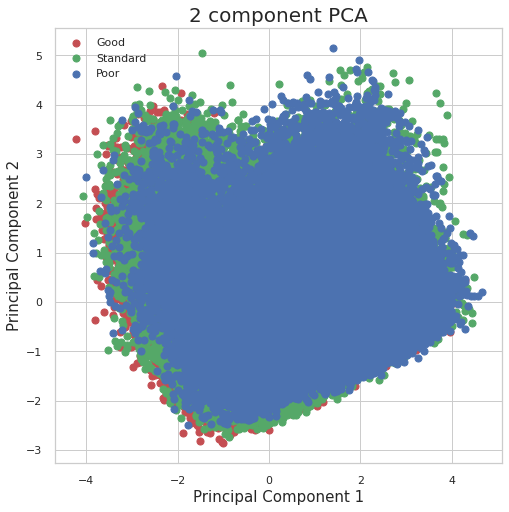

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df_final['Credit_Score'].unique().tolist()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_final['Credit_Score'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'principal component 1']
               , df_final.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)


Como último paso adicionamos las variables que no son numéricas, pero sí son cuantitativas y categóricas y hacemos la transformación de las variables categóricas a valores numéricos para facilitar el procesamiento de las variables

In [ ]:
df_final['Age'] = df['Age']
df_final['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries']
df_final['Num_Credit_Card'] = df['Num_Credit_Card']
df_final['Num_Bank_Accounts'] = df['Num_Bank_Accounts']
df_final['Occupation'] = df['Occupation']
df_final['Payment_Behaviour'] = df['Payment_Behaviour']

In [ ]:
enc1= LabelEncoder()
df_final['Occupation']=enc1.fit_transform(df_final['Occupation'])
df_final['Payment_Behaviour']=enc1.fit_transform(df_final['Occupation'])

In [ ]:
df_final

,Credit_Score,principal component 1,principal component 2,Age,Num_Credit_Inquiries,Num_Credit_Card,Num_Bank_Accounts,Occupation,Payment_Behaviour
0,Good,-0.819946,-1.760783,23.0,4.0,4.0,3.0,12,12
1,Good,-1.137177,-1.529813,23.0,4.0,4.0,3.0,12,12
2,Good,-0.924940,-1.724283,33.0,4.0,4.0,3.0,12,12
3,Good,-0.972558,-0.967856,23.0,4.0,4.0,3.0,12,12
4,Good,-0.622438,-1.963479,23.0,4.0,4.0,3.0,12,12
...,...,...,...,...,...,...,...,...,...
99995,Poor,-0.134025,-1.207318,25.0,3.0,6.0,4.0,9,9
99996,Poor,-0.454595,-1.235464,25.0,3.0,6.0,4.0,9,9
99997,Poor,0.299708,-1.074103,25.0,3.0,6.0,4.0,9,9
99998,Standard,-0.782483,-0.200756,25.0,3.0,6.0,4.0,9,9


Teniendo en cuenta las variables transformadas y seleccionadas, procedemos a plantear los modelos para realizar la clasificación automática.

# Planteamiento del modelo

Para el planteamiento del modelo, realizamos un primer paso que es la división de los datos de entrenmaiento y de prueba. En este caso, el 70% de la base de datos se seleccionó para entrenar los modelos y el 30% como conjunto de prueba.

Para este caso se plantean dos modelos de ensamble: Random Forest y XGBoost.

In [ ]:
y = df_final['Credit_Score']
x = df_final.iloc[:,1:]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Optimización de hiperparametros

En esta etapa se implementa una busqueda ramdorizada para encontrar la combinación de hiperparámetros que optimiza el funcionamiento y la clasificación de los modelos.

In [ ]:
def hyper_optimization(model,params):
  cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1337)
  search = RandomizedSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=4)
  result = search.fit(x_train, y_train)
  return result.best_params_

In [ ]:
# se define la función para calcular las matrices de confusión y las métricas de rendimiento

def matrix_confusion(clf):

  y_train_pred = clf.predict(x_train)
  y_test_pred = clf.predict(x_test)

  plt.figure(figsize = (16,8))
  plt.subplot(1, 2, 1)
  matrix = confusion_matrix(y_train, y_train_pred, normalize = 'true')
  sns.heatmap(matrix, 
              xticklabels=['Good', 'Poor', 'Standard'], 
              yticklabels=['Good', 'Poor', 'Standard'], annot=True);

  plt.title("Confusion matrix - Train")
  plt.ylabel('True type')
  plt.xlabel('Predicted type')


  plt.subplot(1, 2, 2)
  matrix = confusion_matrix(y_test, y_test_pred, normalize = 'true')
  sns.heatmap(matrix, 
              xticklabels=['Good', 'Poor', 'Standard'], 
              yticklabels=['Good', 'Poor', 'Standard'], annot=True);

  plt.title("Confusion matrix - Test")
  plt.ylabel('True type')
  plt.xlabel('Predicted type')

  plt.show()


  print('Reporte clasificación de entrenamiento')
  reporte_train=classification_report(y_train,y_train_pred)
  print(reporte_train)
  print('========================================')
  print('Reporte clasificación de pruebas')
  reporte_test=classification_report(y_test,y_test_pred)
  print(reporte_test)

### Random Forest

Para el caso del random forest se buscó la mejor combinación entre los siguientes hiperparámetros: el número de árboles (n_stimators) y el número de ramas (max_depth), encontrando un número óptimo de 100 árboles y 5 ramas por árbol.

In [ ]:
random_forest = RandomForestClassifier()
params = {'n_estimators':[50,100,150], 
          'max_depth': [2,4,5], 
          'class_weight': ['balanced']}
best_params_rf = hyper_optimization(random_forest,params)

In [ ]:
best_params_rf

{'n_estimators': 100, 'max_depth': 5, 'class_weight': 'balanced'}

In [ ]:
model_rf = RandomForestClassifier(n_estimators = best_params_rf['n_estimators'], 
          max_depth=best_params_rf['max_depth'] , 
          class_weight = best_params_rf['class_weight']) #Instanciamos el modelo

model_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5)

In [ ]:
x_test1= x_test.copy()
x_test1['Prediction']=model_rf.predict(x_test)
x_test1

,principal component 1,principal component 2,Age,Num_Credit_Inquiries,Num_Credit_Card,Num_Bank_Accounts,Occupation,Payment_Behaviour,Prediction
33507,0.193016,-0.025281,35.0,0.0,7.0,0.0,14,14,Good
58446,-0.344345,-1.647541,22.0,6.0,4.0,4.0,14,14,Standard
71266,0.158308,-1.163085,52.0,2.0,5.0,0.0,14,14,Good
58493,1.735136,-0.438456,28.0,0.0,6.0,2.0,13,13,Good
90893,-3.148238,0.414056,36.0,12.0,7.0,7.0,11,11,Poor
...,...,...,...,...,...,...,...,...,...
68056,-1.479400,0.390422,44.0,7.0,9.0,9.0,15,15,Poor
29784,-1.451210,1.483834,33.0,9.0,7.0,7.0,12,12,Poor
95610,-2.956111,1.713207,26.0,11.0,6.0,9.0,5,5,Poor
53716,1.589655,0.999003,18.0,7.0,5.0,4.0,10,10,Standard


Después de encontrar la combinación de hiperparámetros óptima, proseguimos a evaluar el modelo, enontrando la matríz de confusión de entrenamiento y de prueba. 

Como se puede observar, no se presenta un sobreentrenamiento del modelo, encontrando resultados de la clasificación muy similares tanto en entranmiento como en prueba.



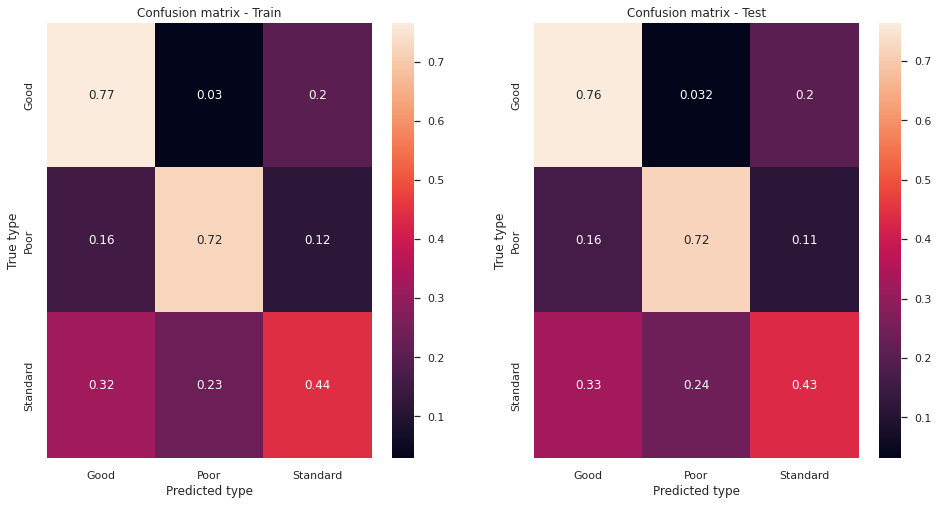

Reporte clasificación de entrenamiento
              precision    recall  f1-score   support

        Good       0.38      0.77      0.51     12438
        Poor       0.62      0.72      0.67     20391
    Standard       0.77      0.44      0.56     37171

    accuracy                           0.58     70000
   macro avg       0.59      0.64      0.58     70000
weighted avg       0.66      0.58      0.58     70000

Reporte clasificación de pruebas
              precision    recall  f1-score   support

        Good       0.38      0.76      0.51      5390
        Poor       0.61      0.72      0.66      8607
    Standard       0.77      0.43      0.55     16003

    accuracy                           0.58     30000
   macro avg       0.59      0.64      0.57     30000
weighted avg       0.65      0.58      0.58     30000



In [ ]:
matrix_confusion(model_rf)


Este algoritmo presenta un accuracy de 58% en test, viendose este bajo valor por la mala clasificación de la clase "Standard" alcanzando apenas un 43% de recall, mientras que para "Good" y "Poor" son del 76% y el 72%, respectivamente. 

Este modelo presenta mala exactitud para clsificar la clase "Standard", pero la clasifica con muy buena precisión. Caso contrario a la clase "Good", donde la precisión apenas es del 38%.

### XGBoost

Para el algoritmo XGBoost se optimizaron los siguientes hiperparámetros: el número de árboles (n_stimators) y el número de ramas (max_depth) y la taza de aprendizaje de cada uno de los árboles. Se encontró un número óptimo de 150 árboles, cada uno con 5 ramas y una taza de aprendizaje del 0.34.

In [ ]:
model_xgb = XGBClassifier()

params_xgb = {'n_estimators': [50,100,150],
              'learning_rate': stats.uniform(0.01, 0.6),
              'max_depth': [2,4,5,None]
             }
xgb_best_params = hyper_optimization(model_xgb ,params_xgb)

In [ ]:
xgb_best_params

{'learning_rate': 0.34371179401706503, 'max_depth': 5, 'n_estimators': 150}

In [ ]:
model_xgb = XGBClassifier(n_estimators = xgb_best_params['n_estimators'], 
          learning_rate=xgb_best_params['learning_rate'], 
          max_depth = xgb_best_params['max_depth'])
model_xgb.fit(x_train, y_train)

XGBClassifier(learning_rate=0.34371179401706503, max_depth=5, n_estimators=150,
              objective='multi:softprob')

In [ ]:
x_test1= x_test.copy()
x_test1['Prediction']=model_xgb.predict(x_test)
x_test1

,principal component 1,principal component 2,Age,Num_Credit_Inquiries,Num_Credit_Card,Num_Bank_Accounts,Occupation,Payment_Behaviour,Prediction
33507,0.193016,-0.025281,35.0,0.0,7.0,0.0,14,14,Standard
58446,-0.344345,-1.647541,22.0,6.0,4.0,4.0,14,14,Standard
71266,0.158308,-1.163085,52.0,2.0,5.0,0.0,14,14,Poor
58493,1.735136,-0.438456,28.0,0.0,6.0,2.0,13,13,Standard
90893,-3.148238,0.414056,36.0,12.0,7.0,7.0,11,11,Poor
...,...,...,...,...,...,...,...,...,...
68056,-1.479400,0.390422,44.0,7.0,9.0,9.0,15,15,Poor
29784,-1.451210,1.483834,33.0,9.0,7.0,7.0,12,12,Poor
95610,-2.956111,1.713207,26.0,11.0,6.0,9.0,5,5,Poor
53716,1.589655,0.999003,18.0,7.0,5.0,4.0,10,10,Standard


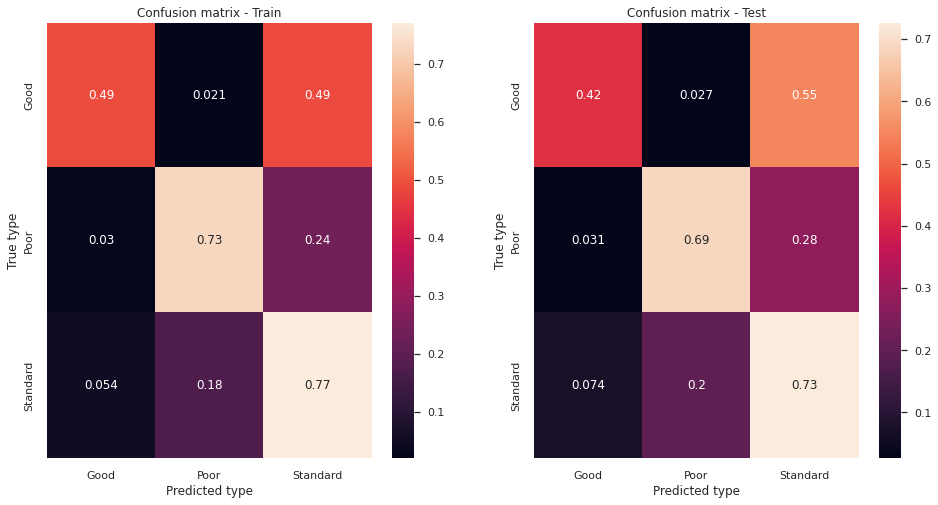

Reporte clasificación de entrenamiento
              precision    recall  f1-score   support

        Good       0.70      0.49      0.58     12438
        Poor       0.69      0.73      0.71     20391
    Standard       0.72      0.77      0.75     37171

    accuracy                           0.71     70000
   macro avg       0.70      0.66      0.68     70000
weighted avg       0.71      0.71      0.71     70000

Reporte clasificación de pruebas
              precision    recall  f1-score   support

        Good       0.61      0.42      0.50      5390
        Poor       0.64      0.69      0.66      8607
    Standard       0.68      0.73      0.70     16003

    accuracy                           0.66     30000
   macro avg       0.65      0.61      0.62     30000
weighted avg       0.66      0.66      0.66     30000



In [ ]:
matrix_confusion(model_xgb)

En el XGBoost presenta una exactitud del 71% en entrenamiento y del 66% en prueba, opteniendo unos resultados en ambas divisiones de datos, descartando el sobrenetrenamiento.

En este modelo de mejoró notablemente la clasificación de la clase "standard", alcanzando un 73% de recall y desmejoró la de la clase "Good" con apenas el 42%. En este modelo también se corrige el tema de la precisión, donde en todas las clases es más del 60%.

# Generalización del modelo (Cross-validation)

El paso final del planteamiento y evaluación de los modelos es analizar la generalización de estos, es decir, el comportamiento de la clasificación para diferentes divisiones de datos.

Para esto, aplicamos una validación cruzada estratificada de 4 folds.

In [ ]:
y = df_final['Credit_Score']
X = df_final.iloc[:,1:]

In [ ]:
def val_performance(X,y,clf):

  acc = []
  result = []

  X = pd.DataFrame(X)


  cv = StratifiedKFold(n_splits=4)
  for train_idx, val_idx in tqdm(cv.split(X, y)):
      X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
      y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
      clf.fit(X_train,y_train)
      y_pred = clf.predict(X_test)




      labels = ['Good', 'Poor', 'Standard']

      for label in labels:
        precision, recall, f1_score,support = precision_recall_fscore_support(np.array(y_test) == label,np.array(y_pred) == label)
        result.append([label,precision[1],recall[1],f1_score[1]])

      
      acc.append(accuracy_score(y_test,y_pred))

  df = pd.DataFrame(result,columns = ["label","precision","recall","f1_score"])
  df_group = df.groupby(['label']).mean()

  return df_group, mean(acc)




In [ ]:
metrics, accuracy = val_performance(x,y,model_rf )

4it [00:27,  6.92s/it]


In [ ]:
print('========== Métricas de rendimiento Random Forest ==================')
print(metrics)
print('-------------------------')
print(f'Accuracy: {accuracy}')

========== Métricas de rendimiento Random Forest ==================
          precision    recall  f1_score
label                                  
Good       0.412103  0.789376  0.541453
Poor       0.609535  0.753155  0.673737
Standard   0.780308  0.440271  0.562803
-------------------------
Accuracy: 0.59324


In [ ]:
metrics, accuracy = val_performance(x,y,model_xgb )


4it [01:57, 29.34s/it]


In [ ]:
print('========== Métricas de rendimiento XGBoost ==================')
print(metrics)
print('-------------------------')
print(f'Accuracy: {accuracy}')

========== Métricas de rendimiento XGBoost ==================
          precision    recall  f1_score
label                                  
Good       0.503655  0.367961  0.424932
Poor       0.668013  0.603386  0.633927
Standard   0.653252  0.746568  0.696779
-------------------------
Accuracy: 0.6375500000000001


La generalización de los modelos confirma lo obtenido anteriormente, siendo el XGBoost presenta una mayor precisión para todas las clases mientras que el recall para las clases "Good" y "Poor" disminuye, en comparación al Random Forest, donde se alcanza el 78% y el 75% para estas clases, respectivamente.

El accuracy obtenido por el XGBoost es mayor que la del Random Forest, con un 63.75%. Sin embargo esta no es una métrica confiable debido al desbalanceo de clases ya antes analizado en el EDA, por lo cual es necesario analizar las otra métricas.

Siendo así, en este caso, para el caso de estudio en cuestión el algoritmo que presenta un mejor rendimiento en cuanto a clasificación es el Randon Forest. 

También se plantea como trabajo futuro la implemnetación o diseño de un método de ensablaje enyre estos dos modelos, ya que como se puede ver, los dos tienen sus ventajas en difernetes casos.

# Segmentación de clientes

Siguiendo con lo planteado inciialmente, se procede con el agrupamiento o segregación de los clientes según su información crediticia y financiera, con el objetivo de recomendad u ofrecer servicios y productos que mejor se adapten a cada cliente. Para esto implementamos el modelo k-means.

El primer paso es la agrupación de los datos para cada uno de los 12500 clientes presentes, siendo la media de estas variables los valores para el análisis y clusterización.


In [ ]:
x1 = df.groupby(['Customer_ID'],as_index = False).mean()

Según lo visto en la correlación calculada en la exploración de datos, el salario mensual y el ingreso anual están altamente correlacionados, por lo cual es información redundante para nuestro algoritmo. Siguiendo esto procedemos a eliminar el ingreso anual de las variables para realizar la segmentación de clientes.

In [ ]:
x1 = x1.iloc[:,2:]
x1.drop(['Annual_Income'],axis=1,inplace=True)
x1

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,2706.161667,6.0,5.00,27.000,18.000,10.875,1562.91,33.477546,42.941090,158.549735,335.375341
1,4250.390000,6.0,5.00,17.000,7.250,3.000,202.68,29.839984,108.366467,146.679378,428.743155
2,9549.782500,1.0,4.00,1.000,13.500,2.375,1030.20,34.841449,0.000000,140.750645,414.788086
3,5208.872500,3.0,3.00,17.000,27.250,6.875,473.14,27.655897,123.434939,118.180443,332.642837
4,6124.869375,3.0,3.00,6.000,12.500,3.000,1233.51,31.933940,208.172007,229.874164,394.966534
...,...,...,...,...,...,...,...,...,...,...,...
12495,1176.398750,0.0,5.75,3.375,12.250,4.250,1229.08,32.889398,33.299764,83.918549,271.671562
12496,2415.855000,8.0,7.00,14.000,15.875,5.000,758.44,32.598257,101.328637,152.775690,259.981173
12497,9727.326667,5.0,6.00,1.000,-0.125,2.250,338.30,33.258053,126.638453,217.787857,353.611399
12498,5218.097500,6.0,8.00,27.000,45.375,12.375,1300.13,34.722108,272.809169,153.646339,339.951771


Teniendo las variables con las cuales se agruparan los clientes, se procede a su estandarización

In [ ]:
x_est = StandardScaler().fit_transform(x1)
x_est = pd.DataFrame(x_est)
x_est.columns = x1.columns
x_est

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.451638,0.243644,-0.257621,1.458201,-0.114640,1.398710,0.597639,0.579420,-0.586155,0.593949,0.028575
1,0.096238,0.243644,-0.257621,0.291598,-0.985023,-0.764881,-1.291416,-1.187187,0.256328,0.323908,1.405932
2,1.976410,-1.708447,-0.751897,-1.574966,-0.478986,-0.936594,-0.142176,1.241809,-1.139108,0.189034,1.200067
3,0.436298,-0.927610,-1.246172,0.291598,0.634295,0.299743,-0.915808,-2.247905,0.450365,-0.324419,-0.011734
4,0.761285,-0.927610,-1.246172,-0.991665,-0.559952,-0.764881,0.140176,-0.170243,1.541526,2.216522,0.907661
...,...,...,...,...,...,...,...,...,...,...,...
12495,-0.994383,-2.098865,0.113085,-1.297898,-0.580193,-0.421454,0.134024,0.293782,-0.710307,-1.103850,-0.911179
12496,-0.554636,1.024481,0.730929,-0.058383,-0.286692,-0.215397,-0.519590,0.152387,0.165702,0.462594,-1.083635
12497,2.039401,-0.146774,0.236654,-1.574966,-1.582146,-0.970937,-1.103070,0.472822,0.491617,1.941569,0.297593
12498,0.439571,0.243644,1.225205,1.458201,2.101801,1.810822,0.232697,1.183851,2.373860,0.482401,0.096087


Después de estandarizar las variables procedemos a calcular el número óptimo de grupos calculando dos índices: Davies-Bouldin y Silhouette. El índice de Davies-Bouldin indica que un menor valor equivale a una mejor partición, mientras que Silhouette plantea que un valor valor mayor, significa una partición más óptima para los datos de estudio. En ambos casos se indica que el número de clusters óptimo para segmentar los clientes es 2.

Text(0, 0.5, 'Índice de Silhouette')

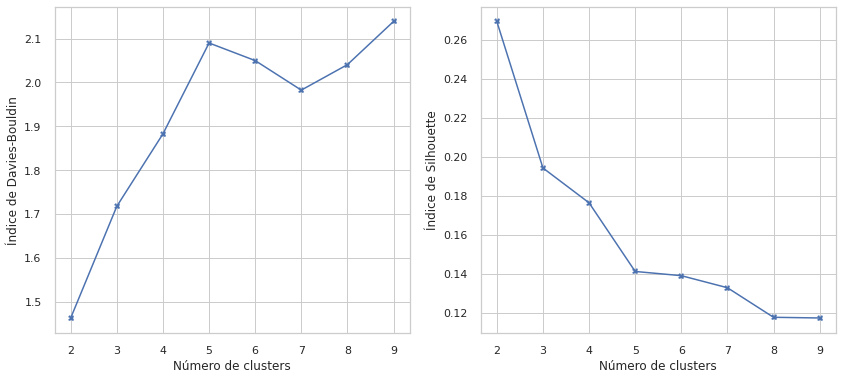

In [ ]:
n_clusters = []; db_value = []; s_value = []

for k in range(2, 10):

    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(x_est) # Algoritmo K means
    
    clusters = kmeans.labels_ # Extraccion de labels

    db_value.append(davies_bouldin_score(x_est,clusters)) 
    s_value.append(silhouette_score(x_est,clusters))
    n_clusters.append(k)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(n_clusters, db_value,marker='X')

plt.xlabel("Número de clusters")
plt.ylabel("Índice de Davies-Bouldin")

plt.subplot(1, 2, 2)
plt.plot(n_clusters, s_value,marker='X')

plt.xlabel("Número de clusters")
plt.ylabel("Índice de Silhouette")

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_est)

labels = kmeans.labels_

Después de encontrar y realizar la partición, procedemos a realizar una reducción de dimensionalidad para lograr ver gráficamente la asignación de los 12500 clientes dentro de los grupos

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_est)
x_final= pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
x_final['labels'] = labels

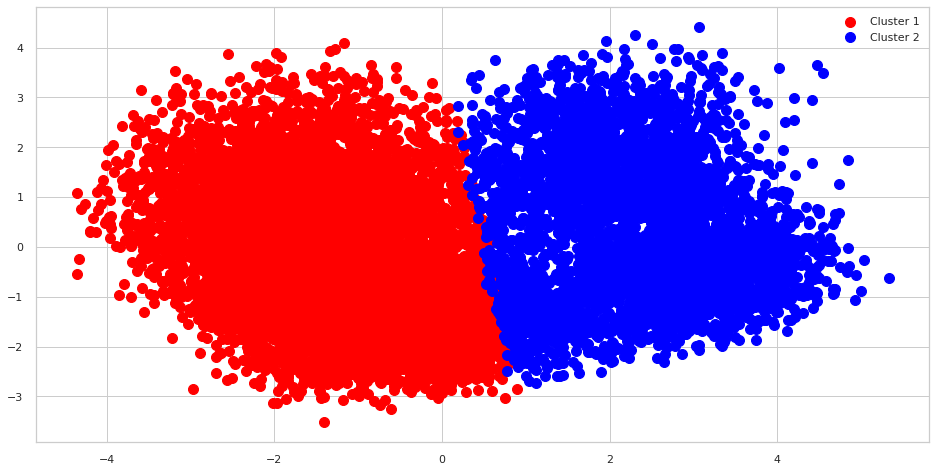

In [ ]:
plt.figure(figsize = (16,8))

plt.scatter(x_final.loc[x_final['labels'] == 0, 'principal component 1'], x_final.loc[x_final['labels'] == 0, 'principal component 2'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_final.loc[x_final['labels'] == 1, 'principal component 1'], x_final.loc[x_final['labels'] == 1, 'principal component 2'], s = 100, c = 'blue', label = 'Cluster 2')


plt.legend()
plt.show()

este cuaderno de notebook también se puede encontrar en el repositorio https://github.com/bryanescobarr/DataScience_coder